<a href="https://colab.research.google.com/github/hae-song/CodeUp/blob/main/d18_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

In [21]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Dropout

In [11]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [12]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [24]:
model = keras.Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5, activation='relu'))  #2차원이 아니고 1차원으로 5
model.add(MaxPooling1D(4))
model.add(SimpleRNN(40))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_5 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                4200      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                      

In [26]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 13s 45ms/step - loss: 0.1294 - accuracy: 0.9533 - val_loss: 0.4503 - val_accuracy: 0.8401
Epoch 2/5
250/250 [==============================] - 11s 43ms/step - loss: 0.0983 - accuracy: 0.9664 - val_loss: 0.5072 - val_accuracy: 0.8408
Epoch 3/5
250/250 [==============================] - 11s 44ms/step - loss: 0.0834 - accuracy: 0.9695 - val_loss: 0.5564 - val_accuracy: 0.8396
Epoch 4/5
250/250 [==============================] - 11s 45ms/step - loss: 0.0718 - accuracy: 0.9732 - val_loss: 0.5700 - val_accuracy: 0.8358
Epoch 5/5
250/250 [==============================] - 11s 43ms/step - loss: 0.0632 - accuracy: 0.9774 - val_loss: 0.6055 - val_accuracy: 0.8376


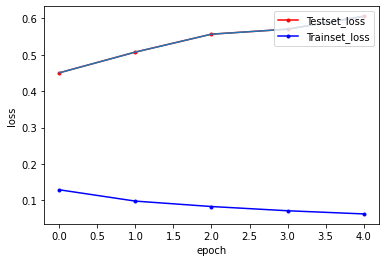

In [29]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue',label='Trainset_loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()